## Dimas Abdi Yudha
## 2109106005
## Informatika A'21 A1
## Posttest 8 Deep Learning

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

## Klasifikasi Dataset

In [2]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load("caltech101", split=["train[:70%]", "train[:30%]"], batch_size=-1, as_supervised=True)

## Menampilkan gambar dataset

<function matplotlib.pyplot.show(close=None, block=None)>

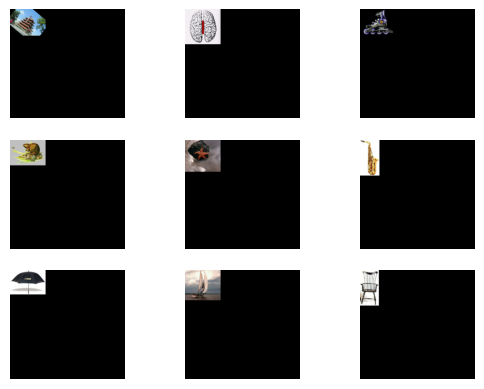

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show

## Melakukan Encoding

In [4]:
num_class = 102
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test  = tf.keras.utils.to_categorical(y_test_raw, num_class)

## Menampilkan Shape

In [5]:
x_train_raw.shape

TensorShape([2141, 919, 969, 3])

In [6]:
x_test_raw.shape

TensorShape([918, 594, 623, 3])

## Konversi 28x28 

In [7]:
train = tf.image.resize(x_train_raw, (28, 28))
test = tf.image.resize(x_test_raw, (28, 28))

In [8]:
train = np.reshape(train.numpy(), (2141, 2352))
test = np.reshape(test.numpy(), (918, 2352))

## Normalisasi Pixel

In [9]:
train = train.astype('float32')/255
test = test.astype('float32')/255

## Membuat DNN

In [37]:
model = Sequential(
    [
        Dense(512, activation = 'relu', input_dim = (2352)),
        Dense(256, activation = 'relu'),
        Dense(102, activation = 'softmax')
    ]
)

## Summary Model

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               1204736   
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 102)               26214     
                                                                 
Total params: 1,362,278
Trainable params: 1,362,278
Non-trainable params: 0
_________________________________________________________________


## Model Optimizer

In [42]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Fitting dan training model

In [43]:
fit = model.fit(train, y_train, batch_size=32, epochs=40, validation_data=(test, y_test))

Epoch 1/40
67/67 [==============================] - 2s 19ms/step - loss: 0.0600 - accuracy: 0.9972 - val_loss: 40.1164 - val_accuracy: 0.0087
Epoch 2/40
67/67 [==============================] - 1s 15ms/step - loss: 0.0464 - accuracy: 0.9991 - val_loss: 40.1113 - val_accuracy: 0.0087
Epoch 3/40
67/67 [==============================] - 1s 12ms/step - loss: 0.0433 - accuracy: 1.0000 - val_loss: 40.1475 - val_accuracy: 0.0087
Epoch 4/40
67/67 [==============================] - 1s 11ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 40.1831 - val_accuracy: 0.0087
Epoch 5/40
67/67 [==============================] - 1s 12ms/step - loss: 0.0404 - accuracy: 1.0000 - val_loss: 40.2469 - val_accuracy: 0.0087
Epoch 6/40
67/67 [==============================] - 1s 13ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 40.3008 - val_accuracy: 0.0087
Epoch 7/40
67/67 [==============================] - 1s 12ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 40.3475 - val_accuracy: 0.0087
Epoch 

## Evaluasi Data Seteleah Proses Training

In [41]:
score = model.evaluate(test, y_test)
print("TEST LOSS           : ", score [0])
print("TEST ACCURACY       : ", score [1])
print("VALIDATION LOSS     : ", fit.history['val_loss'][-1])
print("VALIDATION ACCURACY : ", fit.history['val_accuracy'][-1])

29/29 [==============================] - 0s 6ms/step - loss: 40.1989 - accuracy: 0.0076
TEST LOSS           :  40.19894790649414
TEST ACCURACY       :  0.007625272497534752
VALIDATION LOSS     :  40.19894790649414
VALIDATION ACCURACY :  0.007625272497534752
